# Introduction to Pandas

In this section of the course we will learn how to use pandas for data analysis. You can think of pandas as an extremely powerful version of Excel, with a lot more features. In this section of the course, you should go through the notebooks in this order:

* Introduction to Pandas
* Series
* DataFrames
* Missing Data
* Concatenating and Append
* Operations 
* Aggregation and Grouping
* Data Input and Output

In [94]:
import numpy as np
import pandas as pd
from numpy.random import randn
np.random.seed(101)

## Pandas Essentials
- A Series is a named Python list (dict with list as value).
- A DataFrame is a bunch of Series objects put together to share the same index.

In [95]:
ser1 = pd.Series([1,2,3,4],index = ['USA', 'Germany','USSR', 'Japan'])
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [96]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [97]:
df[df['Y']<0] # Lets get the rows in column Y where the value is less than 0 

,W,X,Y,Z
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057


### Missing Values

In [98]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [99]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [44]:
df.dropna() #Lets drop all nas

,A,B,C
0,1.0,5.0,1


In [45]:
df.dropna(axis =0) #Lets drop all nas row-wise

,A,B,C
0,1.0,5.0,1


In [100]:
df.dropna(axis =1) #Lets drop all nas column-wise

,C
0,1
1,2
2,3


In [47]:
df.dropna?

In [101]:
df.dropna(how= 'any')

,A,B,C
0,1.0,5.0,1


In [102]:
df.dropna(how= 'all')

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [103]:
df.dropna(thresh=3) #Lets drop rows that has less than 2 non-nas

,A,B,C
0,1.0,5.0,1


In [104]:
df.dropna(axis = 1,thresh =2)

,A,C
0,1.0,1
1,2.0,2
2,NaN,3


In [105]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [106]:
df.dropna(thresh=2, inplace=True) # Lets inplace
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [107]:
df.fillna(value='FILL VALUE') #Lets fill nas with "FILL VALUE"

,A,B,C
0,1.0,5,1
1,2.0,FILL VALUE,2


In [108]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [64]:
df.fillna(method='pad') #Lets pad the NAs

,A,B,C
0,1.0,5.0,1
1,2.0,5.0,2
2,2.0,5.0,3


In [33]:
df.fillna(axis= 1, method = 'backfill')

,A,B,C
0,1.0,5.0,1.0
1,2.0,2.0,2.0
2,3.0,3.0,3.0


In [34]:
df.fillna(axis= 1, method = 'ffill')

,A,B,C
0,1.0,5.0,1.0
1,2.0,2.0,2.0
2,NaN,NaN,3.0


In [109]:
df.fillna(method = 'backfill')

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [36]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [110]:
df.set_value(2,'A',10) # Lets change the row-2, column A with value 10 using set_value
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,10.0,NaN,3


In [111]:
df.iloc[2,1]=4
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,10.0,4.0,3


## Data Input and Output

This notebook is the reference code for getting input and output, pandas can read a variety of file types using its pd.read_ methods. Let's take a look at the most common data types:

In [22]:
import numpy as np
import pandas as pd

## CSV

### CSV Input

In [112]:
df = pd.read_csv('example')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


### CSV Output

In [113]:
pwd

'C:\\Users\\Star\\Google Drive\\Courses\\My Lectures\\Analytics programing\\Python- Basic programing\\OU- Python\\Notebook\\6- Pandas'

In [22]:
df.to_csv('example1',index=False)

## Excel
Pandas can read and write excel files, keep in mind, this only imports data. Not formulas or images, having images or macros may cause this read_excel method to crash. 

### Excel Input and output

In [71]:
pd.read_excel('Excel_Sample.xlsx',sheetname='Sheet1')
pd.read_excel?

In [24]:
df.to_excel('Excel_Sample.xlsx',sheet_name='Sheet1')

## Reading data- head and tail

In [114]:
# Read in the data file: df
df = pd.read_csv('df_climate.csv')

# Print the output of df.head()
print(df.head())

# Read in the data file with header=None: df_headers
df_headers = pd.read_csv('df_climate.csv', header = None)

# Print the output of df_headers.head()
print(df_headers.head())

                  Date  Temperature  DewPoint  Pressure
0  2010-01-01 00:00:00         46.2      37.5       1.0
1  2010-01-01 01:00:00         44.6      37.1       1.0
2  2010-01-01 02:00:00         44.1      36.9       1.0
3  2010-01-01 03:00:00         43.8      36.9       1.0
4  2010-01-01 04:00:00         43.5      36.8       1.0
                     0            1         2         3
0                 Date  Temperature  DewPoint  Pressure
1  2010-01-01 00:00:00         46.2      37.5       1.0
2  2010-01-01 01:00:00         44.6      37.1       1.0
3  2010-01-01 02:00:00         44.1      36.9       1.0
4  2010-01-01 03:00:00         43.8      36.9       1.0


In [115]:
df.tail() #Lets print the tail

,Date,Temperature,DewPoint,Pressure
8754,2010-12-31 19:00:00,51.1,38.1,1.0
8755,2010-12-31 20:00:00,49.0,37.9,1.0
8756,2010-12-31 21:00:00,47.9,37.9,1.0
8757,2010-12-31 22:00:00,46.9,37.9,1.0
8758,2010-12-31 23:00:00,46.2,37.7,1.0


In [116]:
df.tail(3)

,Date,Temperature,DewPoint,Pressure
8756,2010-12-31 21:00:00,47.9,37.9,1.0
8757,2010-12-31 22:00:00,46.9,37.9,1.0
8758,2010-12-31 23:00:00,46.2,37.7,1.0


In [117]:
s = pd.Series([1, 2, 3])
s.describe()


count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
dtype: float64

In [119]:
df1 = pd.DataFrame([[1, 'a'], [2, 'b'], [3, 'c'], [4,'c']],
...                   columns=['numeric', 'object'])
df1

,numeric,object
0,1,a
1,2,b
2,3,c
3,4,c


In [121]:
df1.describe()

,numeric
count,4.000000
mean,2.500000
std,1.290994
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [122]:
df1.describe(include='all')

,numeric,object
count,4.000000,4
unique,NaN,3
top,NaN,c
freq,NaN,2
mean,2.500000,NaN
std,1.290994,NaN
min,1.000000,NaN
25%,1.750000,NaN
50%,2.500000,NaN
75%,3.250000,NaN


In [123]:
df.describe()

,Temperature,DewPoint,Pressure
count,8759.000000,8759.000000,8759.0
mean,68.077258,55.939057,1.0
std,13.773378,11.757706,0.0
min,41.800000,35.300000,1.0
25%,57.100000,44.400000,1.0
50%,68.700000,57.300000,1.0
75%,78.550000,67.800000,1.0
max,95.300000,72.900000,1.0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 4 columns):
Date           8759 non-null object
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3), object(1)
memory usage: 273.8+ KB


### Groupby

The groupby method allows you to group rows of data together and call aggregate functions

In [125]:
# Create dataframe
data = {'University':['OU','OSU','TU','OU','OSU','TU'],
       'College':['Business','Business','Business','Engineering','Engineering','Engineering'],
       'Students':[1300,1200,340,4000,2430,350]}

In [126]:
df = pd.DataFrame(data)
df

,College,Students,University
0,Business,1300,OU
1,Business,1200,OSU
2,Business,340,TU
3,Engineering,4000,OU
4,Engineering,2430,OSU
5,Engineering,350,TU


In [127]:
by_school = df.groupby("University") #lets groupby university 

In [128]:
by_school.mean() #Calculate the mean

,Students
University,
OSU,1815
OU,2650
TU,345


In [129]:
by_school.min()

,College,Students
University,,
OSU,Business,1200
OU,Business,1300
TU,Business,340


In [130]:
by_college = df.groupby("College").mean()
by_college

,Students
College,
Business,946.666667
Engineering,2260.000000


In [131]:
print(by_school.std())
print(by_school.min())

               Students
University             
OSU          869.741341
OU          1909.188309
TU             7.071068
             College  Students
University                    
OSU         Business      1200
OU          Business      1300
TU          Business       340


In [132]:
df.groupby(['College','University']).mean()

Students
College     University          
Business    OSU             1200
            OU              1300
            TU               340
Engineering OSU             2430
            OU              4000
            TU               350

In [133]:
by_school.describe() #Lets describe by_school

Students                                                       \
              count    mean          std     min     25%     50%     75%   
University                                                                 
OSU             2.0  1815.0   869.741341  1200.0  1507.5  1815.0  2122.5   
OU              2.0  2650.0  1909.188309  1300.0  1975.0  2650.0  3325.0   
TU              2.0   345.0     7.071068   340.0   342.5   345.0   347.5   

                    
               max  
University          
OSU         2430.0  
OU          4000.0  
TU           350.0

In [134]:
by_school.describe().transpose() #Lets transpose the dataset

University              OSU           OU          TU
Students count     2.000000     2.000000    2.000000
         mean   1815.000000  2650.000000  345.000000
         std     869.741341  1909.188309    7.071068
         min    1200.000000  1300.000000  340.000000
         25%    1507.500000  1975.000000  342.500000
         50%    1815.000000  2650.000000  345.000000
         75%    2122.500000  3325.000000  347.500000
         max    2430.000000  4000.000000  350.000000

In [135]:
by_school.describe().transpose()['OU']

Students  count       2.000000
          mean     2650.000000
          std      1909.188309
          min      1300.000000
          25%      1975.000000
          50%      2650.000000
          75%      3325.000000
          max      4000.000000
Name: OU, dtype: float64

# Matplotlib
Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. He created it to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you.

It is an excellent 2D and 3D graphics library for generating scientific figures. 

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

Matplotlib allows you to create reproducible figures programmatically. Let's learn how to use it! Before continuing this lecture, I encourage you just to explore the official Matplotlib web page: http://matplotlib.org/

## Installation 

You'll need to install matplotlib first with either:

    conda install matplotlib
or
    pip install matplotlib
    
## Importing

Import the `matplotlib.pyplot` module under the name `plt`

In [136]:
import matplotlib.pyplot as plt

In [137]:
# You'll also need to use this line to see plots in the notebook:
%matplotlib inline

## Simple Example

Let's walk through a very simple example using two numpy arrays.

** The data we want to plot:**

In [138]:
x = np.linspace(0, 10, 11)
y = x * 2

In [139]:
x

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [140]:
y

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.])

## Basic Matplotlib Commands

Lets create our first simple line plot using the following:

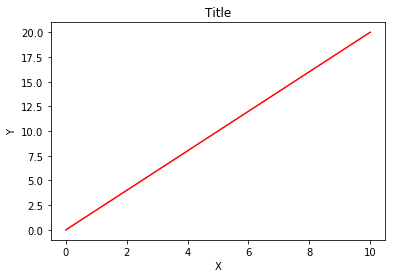

In [262]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title');


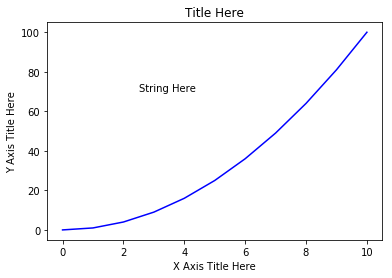

In [90]:
x = np.linspace(0,10,11)
y = x ** 2

plt.plot(x, y, 'b') # 'b' is the color blue
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('Title Here')
plt.text(2.5,70, "String Here");

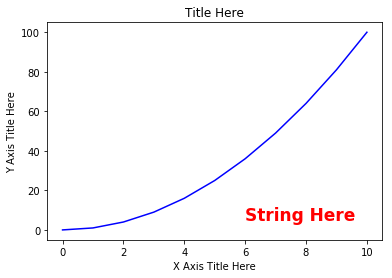

In [143]:
x = np.linspace(0,10,11)
y = x ** 2

plt.plot(x, y, 'b')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('Title Here')
plt.text(6,5, "String Here",color = "r", fontsize = 17, fontweight= "bold")
plt.show()

## Subplots

    -subplot(numRows, numCols, plotNum)
    -Creates axes in a regular grid of axes numRows by numCols
    -plotNum becomes the current subplot
    -Subplots numbered top-down, left-to-right

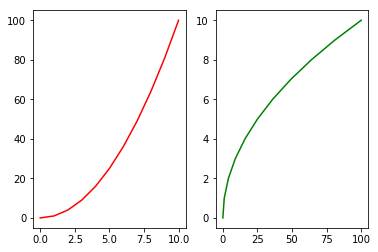

In [144]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r')
plt.subplot(1,2,2)
plt.plot(y, x, 'g');

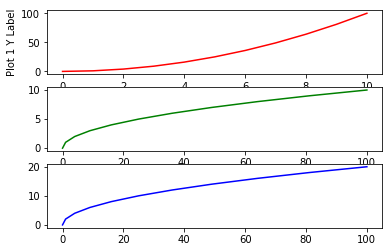

In [93]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(3,1,1)
plt.plot(x, y, 'r')
plt.ylabel("Plot 1 Y Label")
plt.subplot(3,1,2)
plt.plot(y, x, 'g')
plt.subplot(3,1,3)
plt.plot(y, x*2, 'b');

### Object Oriented Method

The main idea in using the more formal Object Oriented method is to create figure objects and then just call methods or attributes off of that object. This approach is nicer when dealing with a canvas that has multiple plots on it. 

To begin we create a figure instance. Then we can add axes to that figure:

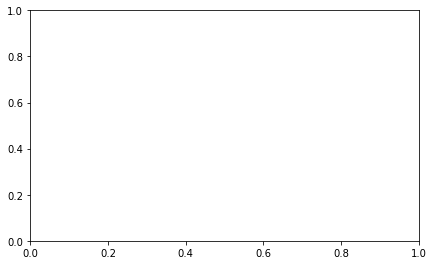

In [145]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.9, 0.8]) # left, bottom, width, height (range 0 to 1)

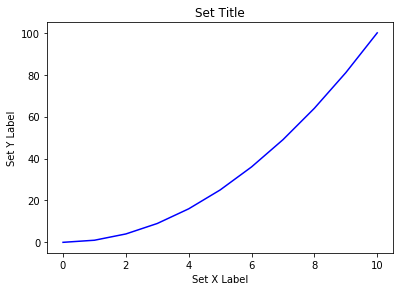

In [146]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set Y Label')
axes.set_title('Set Title');

Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

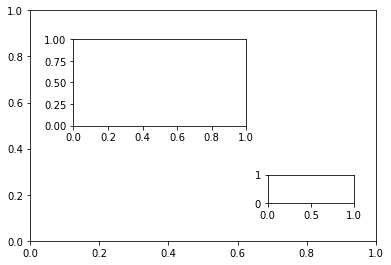

In [273]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes
axes3 = fig.add_axes([0.65, 0.23, 0.2, 0.1]) # inset axes

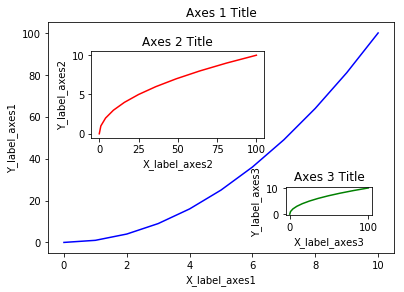

In [274]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes
axes3 = fig.add_axes([0.65, 0.23, 0.2, 0.1]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes1')
axes1.set_ylabel('Y_label_axes1')
axes1.set_title('Axes 1 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title')

# Insert Figure Axes 3
# Insert Figure Axes 2
axes3.plot(y, x, 'g')
axes3.set_xlabel('X_label_axes3')
axes3.set_ylabel('Y_label_axes3')
axes3.set_title('Axes 3 Title');

### Subplots with Object Oriented Method


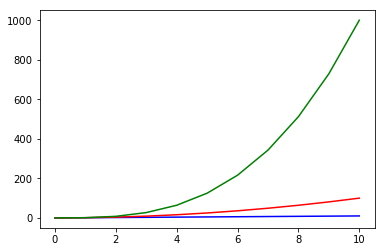

In [278]:
fig, ax = plt.subplots()

ax.plot(x, x, 'b')
ax.plot(x, x**2,'r')
ax.plot(x, x**3, 'g');

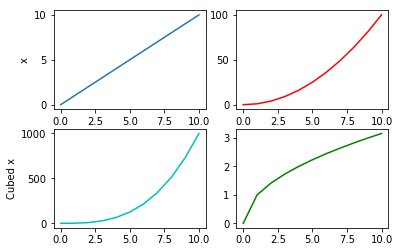

In [148]:
fig, axes = plt.subplots(nrows=2,ncols=2)

axes[0,0].plot(x, x)
axes[0,0].set_ylabel("x")
axes[0,1].plot(x, x**2, 'r')
axes[1,1].plot(x, x**0.5, 'g')
axes[1,0].plot(x, x**3, 'c')
axes[1,0].set_ylabel("Cubed x");
fig.savefig('subplotoo.png', dpi= 200)

## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

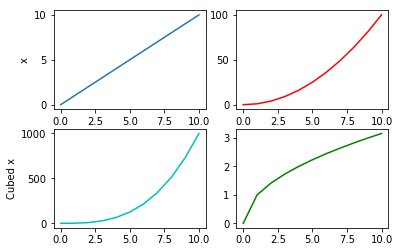

In [149]:
fig

In [150]:
fig.savefig("my_fig1.png")

In [151]:
# Here we can also optionally specify the DPI and choose between different output formats:

fig.savefig("my_fig2.png", dpi=200)


In [152]:
fig.savefig("my_fig3.pdf")

### Legends 

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure: 

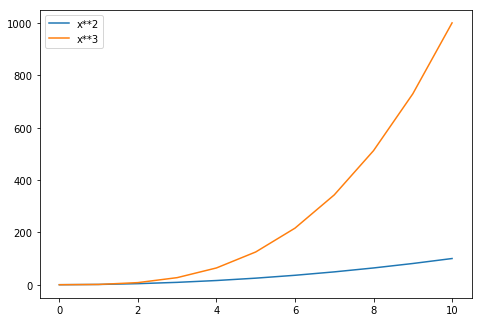

In [153]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend();
fig.savefig("my_fig4", dpi= 300)

The **legend** function takes an optional keyword argument **loc** that can be used to specify where in the figure the legend is to be drawn. The allowed values of **loc** are numerical codes for the various places the legend can be drawn. See the [documentation page](http://matplotlib.org/users/legend_guide.html#legend-location) for details. Some of the most common **loc** values are:

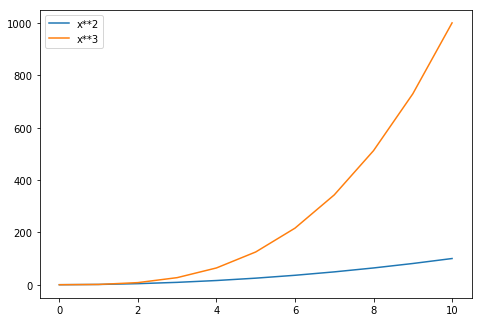

In [204]:
# Lots of options....

ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

# .. many more options are available

# Most common to choose
ax.legend(loc=0) # let matplotlib decide the optimal location
fig

## Setting colors, linewidths, linetypes

Matplotlib gives you *a lot* of options for customizing colors, linewidths, and linetypes. 

There is the basic MATLAB like syntax (which I would suggest you avoid using for more clairty sake:

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

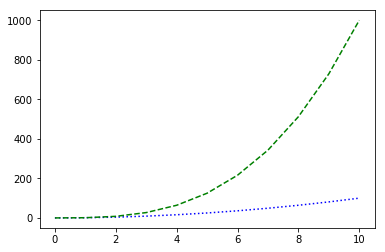

In [289]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b:') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments. Alpha indicates opacity.

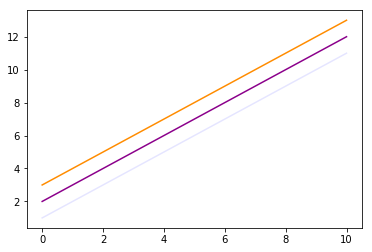

In [291]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

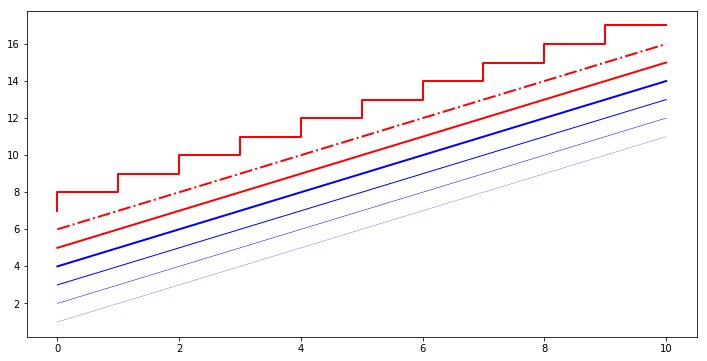

In [154]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, x+1, color='blue', linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)
# possible linestype options ‘-‘, ‘{’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls='steps');
fig.savefig('moreoptions')



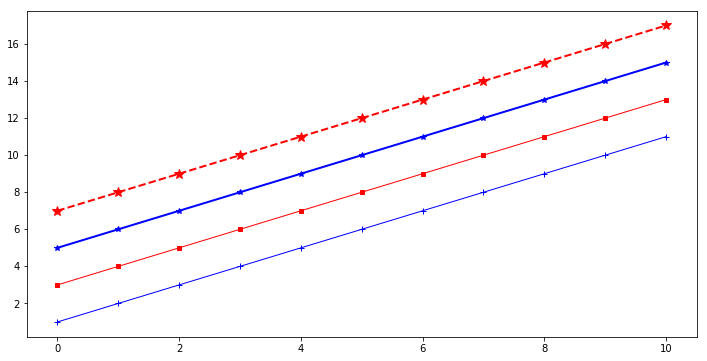

In [208]:
# possible marker options
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, x+1, color='blue', lw=1, marker = '+')

ax.plot(x, x+3, color="red", lw =1, marker = 's', markersize= 4)

ax.plot(x, x+5, color="b", lw=2, linestyle='-', marker = '*', markersize= 6)

ax.plot(x, x+7, color="red", lw=2, ls='--', marker = '*', markersize =10);
fig.savefig('moreoptions')


## Other Plots
- Bar charts
- Histograms
- Scatter plots
- Fill between

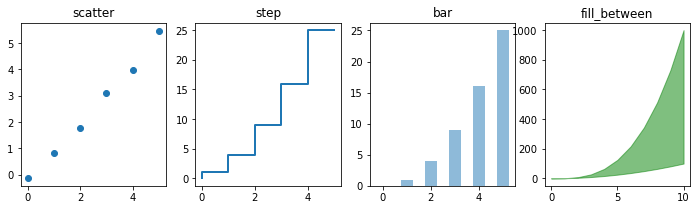

In [141]:
xx = np.array([0,1,2,3,4,5])
fig, axes = plt.subplots(1, 4, figsize=(12,3))
axes[0].scatter(xx, xx + 0.25*randn(len(xx)))
axes[0].set_title("scatter")
axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")
axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")
axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5)
axes[3].set_title("fill_between");
fig.savefig("otherplots")


### Histograms

hist(x, bins=n )

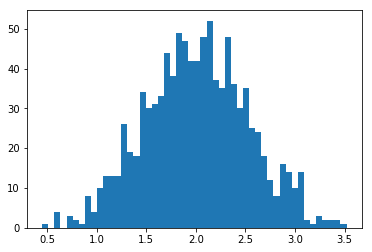

In [155]:
fig = plt.figure()
x = np.random.normal(2, 0.5, 1000)
plt.hist(x, bins=50);
fig.savefig('my_hist')

### Scatter Plots

scatter(x, y )

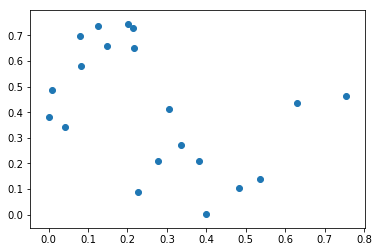

In [156]:
fig= plt.figure()
N = 20
x = 0.9*np.random.rand(N)
y = 0.9*np.random.rand(N)
plt.scatter(x,y);


# Great Job!